<center><h1>Chen_PoHao_HW4</h1></center>
<br>
<br>

Name: Po Hao Chen
<br>
Github Username: pohaoc29
<br>
USC ID: 4213309111
<br>
<b>Late day submission: 2 days</b>

## 1. Time Series Classification Part 1: Feature Creation/Extraction (HW3 Rerun)

### (a) Obtain Data

Import packages

In [1]:
import os,sys
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Get the AReM Data Set

In [2]:
# bending1: 7 datasets
path = '../data/AReM/bending1/'
files = os.listdir(path)
bending1_csv = list(sorted(filter(lambda x:(x[0:7] == 'dataset' and x[-4:] == '.csv'),files)))

bending1_dflist = []
for file_item in bending1_csv:
    temp = pd.read_csv(path + file_item, header=4)
    temp.rename(columns = {'# Columns: time':'time'}, inplace = True)
    bending1_dflist.append(temp)



# bending2_df: 6
path = '../data/AReM/bending2/'
files = os.listdir(path)
bending2_csv = list(sorted(filter(lambda x:(x[0:7] == 'dataset' and x[-4:] == '.csv'),files)))

bending2_dflist = []
for file_item in bending2_csv:
    temp = pd.read_csv(path + file_item, header=4)
    temp.rename(columns = {'# Columns: time':'time'}, inplace = True)
    bending2_dflist.append(temp)


# cycling: 15
path = '../data/AReM/cycling/'
files = os.listdir(path)
cycling_csv = list(sorted(filter(lambda x:(x[0:7] == 'dataset' and x[-4:] == '.csv'),files)))

cycling_dflist = []
for file_item in cycling_csv:
    temp = pd.read_csv(path + file_item, header=4)
    temp.rename(columns = {'# Columns: time':'time'}, inplace = True)
    cycling_dflist.append(temp)
    

# lying: 15
path = '../data/AReM/lying/'
files = os.listdir(path)
lying_csv = list(sorted(filter(lambda x:(x[0:7] == 'dataset' and x[-4:] == '.csv'),files)))

lying_dflist = []
for file_item in lying_csv:
    temp = pd.read_csv(path + file_item, header=4)
    temp.rename(columns = {'# Columns: time':'time'}, inplace = True)
    lying_dflist.append(temp)

    
# sitting: 15
path = '../data/AReM/sitting/'
files = os.listdir(path)
sitting_csv = list(sorted(filter(lambda x:(x[0:7] == 'dataset' and x[-4:] == '.csv'),files)))

sitting_dflist = []
for file_item in sitting_csv:
    temp = pd.read_csv(path + file_item, header=4)
    temp.rename(columns = {'# Columns: time':'time'}, inplace = True)
    sitting_dflist.append(temp)
    
#standing: 15
path = '../data/AReM/standing/'
files = os.listdir(path)
standing_csv = list(sorted(filter(lambda x:(x[0:7] == 'dataset' and x[-4:] == '.csv'),files)))

standing_dflist = []
for file_item in standing_csv:
    temp = pd.read_csv(path + file_item, header=4)
    temp.rename(columns = {'# Columns: time':'time'}, inplace = True)
    standing_dflist.append(temp)


#walking: 15
path = '../data/AReM/walking/'
files = os.listdir(path)
walking_csv = list(sorted(filter(lambda x:(x[0:7] == 'dataset' and x[-4:] == '.csv'),files)))

walking_dflist = []
for file_item in walking_csv:
    temp = pd.read_csv(path + file_item, header=4)
    temp.rename(columns = {'# Columns: time':'time'}, inplace = True)
    walking_dflist.append(temp)

#### All data pre-processing is indicate in HW3, so I just do the completely same steps without explaination.

In [3]:
new = bending2_dflist[3]['time'].str.split(" ",n=6,expand=True)
bending2_dflist[3]['time'] = new[0]
bending2_dflist[3]['avg_rss12'] = new[1]
bending2_dflist[3]['var_rss12'] = new[2]
bending2_dflist[3]['avg_rss13'] = new[3]
bending2_dflist[3]['var_rss13'] = new[4]
bending2_dflist[3]['avg_rss23'] = new[5]
bending2_dflist[3]['var_rss23'] = new[6]

bending2_dflist[3] = bending2_dflist[3].astype('float64')
bending2_dflist[3]['time'] = bending2_dflist[3]['time'].astype('int64')

bending2_dflist[3]

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0,32.50,0.50,0.00,0.00,19.00,1.00
1,250,32.50,0.50,0.00,0.00,18.50,0.50
2,500,32.75,0.43,1.00,0.00,18.00,0.00
3,750,32.50,0.50,0.00,0.00,17.50,0.50
4,1000,32.50,0.50,7.50,0.50,17.50,0.87
...,...,...,...,...,...,...,...
475,118750,28.67,0.47,4.67,1.25,17.33,0.47
476,119000,27.50,0.50,5.50,2.50,17.25,1.30
477,119250,28.00,0.00,6.67,0.94,17.00,1.00
478,119500,28.00,0.00,5.00,0.82,17.00,0.71


In [4]:
sitting_dflist[13].loc[479] = [13500, sitting_dflist[13]['avg_rss12'].mean(), sitting_dflist[13]['var_rss12'].mean(), sitting_dflist[13]['avg_rss13'].mean(), sitting_dflist[13]['var_rss13'].mean(), sitting_dflist[13]['avg_rss23'].mean(), sitting_dflist[13]['var_rss23'].mean()]
sitting_dflist[13] = sitting_dflist[13].sort_values(by=['time'])
sitting_dflist[13].index = [i for i in range(0,480,1)]
sitting_dflist[13].head(56)

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0.0,44.000000,0.710000,18.750000,0.43000,7.750000,1.300000
1,250.0,44.000000,0.000000,18.500000,0.50000,8.670000,0.470000
2,500.0,43.750000,0.830000,18.000000,0.00000,9.670000,0.940000
3,750.0,43.750000,0.430000,18.250000,0.43000,9.000000,0.000000
4,1000.0,43.750000,0.430000,18.000000,0.00000,9.000000,0.000000
5,1250.0,44.000000,0.000000,18.250000,0.43000,10.000000,0.000000
6,1500.0,44.000000,0.000000,18.000000,0.00000,10.750000,1.090000
7,1750.0,43.500000,0.500000,18.000000,0.00000,11.000000,0.710000
8,2000.0,44.000000,0.000000,18.000000,0.00000,12.000000,0.000000
9,2250.0,43.500000,0.500000,18.000000,0.00000,12.000000,0.000000


### (b) Splitting Data

In [5]:
#test data : datasets 1 and 2 in bending1 and bending2 + datasets1,2,3 in other
#train data : rest

#train data
bending1_train = pd.concat(bending1_dflist[2:])
bending2_train = pd.concat(bending2_dflist[2:])
cycling_train = pd.concat(cycling_dflist[3:]) 
lying_train = pd.concat(lying_dflist[3:]) 
sitting_train = pd.concat(sitting_dflist[3:]) 
standing_train = pd.concat(standing_dflist[3:]) 
walking_train = pd.concat(walking_dflist[3:]) 

All_train_df = pd.concat([bending1_train, bending2_train, cycling_train, lying_train, sitting_train, standing_train, walking_train])


#test data
bending1_test = pd.concat(bending1_dflist[0:2])
bending2_test = pd.concat(bending2_dflist[0:2])
cycling_test = pd.concat(cycling_dflist[0:3])
lying_test = pd.concat(lying_dflist[0:3])
sitting_test = pd.concat(sitting_dflist[0:3])
standing_test = pd.concat(standing_dflist[0:3])
walking_test = pd.concat(walking_dflist[0:3])

All_test_df = pd.concat([bending1_test, bending2_test, cycling_test, lying_test, sitting_test, standing_test, walking_test])

### (c) Feature Extraction

In [6]:
All_df = pd.concat([pd.concat(bending1_dflist[::1]), pd.concat(bending2_dflist[::1]), pd.concat(cycling_dflist[::1]), pd.concat(lying_dflist[::1]), pd.concat(sitting_dflist[::1]), pd.concat(standing_dflist[::1]), pd.concat(walking_dflist[::1])])

activities = ['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']
activities_data = [7, 6, 15, 15, 15, 15, 15]
time_domain_features = ['min', 'max', 'mean', 'median', 'standard deviation', '1st quartile', '3rd quartile']
time_series = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
time_domain_of_six_time_series = pd.DataFrame()


time_domain_list = list()
for i in range(0,42240,480):
    time_domain_list.clear()
    for j in range(len(time_series)):
        Min = All_df[i:i+480][time_series[j]].min()
        Max = All_df[i:i+480][time_series[j]].max()
        Mean = All_df[i:i+480][time_series[j]].mean()
        Median = All_df[i:i+480][time_series[j]].median()
        SD = All_df[i:i+480][time_series[j]].std()
        FirstQ = All_df[i:i+480][time_series[j]].quantile(0.25)
        ThirdQ = All_df[i:i+480][time_series[j]].quantile(0.75)
        time_domain_list.extend([Min, Max, Mean, Median, SD, FirstQ, ThirdQ])
    
    time_domain_of_six_time_series = (pd.concat([time_domain_of_six_time_series, pd.DataFrame(time_domain_list).T], ignore_index=True))

time_domain_of_six_time_series.index.name = 'Instance'
time_domain_of_six_time_series.index = time_domain_of_six_time_series.index + 1
time_domain_of_six_time_series.columns = [time_domain_features[i%7]+str(int(i/7+1)) for i in range(42)]
time_domain_of_six_time_series

,min1,max1,mean1,median1,standard deviation1,1st quartile1,3rd quartile1,min2,max2,mean2,...,standard deviation5,1st quartile5,3rd quartile5,min6,max6,mean6,median6,standard deviation6,1st quartile6,3rd quartile6
Instance,,,,,,,,,,,,,,,,,,,,,
1,37.25,45.00,40.624792,40.500,1.476967,39.25,42.0000,0.0,1.30,0.358604,...,2.188449,33.0000,36.00,0.0,1.92,0.570583,0.430,0.582915,0.00,1.3000
2,38.00,45.67,42.812812,42.500,1.435550,42.00,43.6700,0.0,1.22,0.372437,...,1.995255,32.0000,34.50,0.0,3.11,0.571083,0.430,0.601010,0.00,1.3000
3,35.00,47.40,43.954500,44.330,1.558835,43.00,45.0000,0.0,1.70,0.426250,...,1.999604,35.3625,36.50,0.0,1.79,0.493292,0.430,0.513506,0.00,0.9400
4,33.00,47.75,42.179812,43.500,3.670666,39.15,45.0000,0.0,3.00,0.696042,...,3.849448,30.4575,36.33,0.0,2.18,0.613521,0.500,0.524317,0.00,1.0000
5,33.00,45.75,41.678063,41.750,2.243490,41.33,42.7500,0.0,2.83,0.535979,...,2.411026,28.4575,31.25,0.0,1.79,0.383292,0.430,0.389164,0.00,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,20.75,46.25,34.763333,35.290,4.742208,31.67,38.2500,0.0,12.68,4.223792,...,3.174681,14.2500,18.33,0.0,9.39,3.288271,3.270,1.647528,2.05,4.3050
85,21.50,51.00,34.935812,35.500,4.645944,32.00,38.0625,0.0,12.21,4.115750,...,3.192058,14.2375,18.25,0.0,10.21,3.280021,3.015,1.700918,2.12,4.5000
86,18.33,47.67,34.333042,34.750,4.948770,31.25,38.0000,0.0,12.48,4.396958,...,3.000493,13.7500,18.00,0.0,8.01,3.261583,2.980,1.617290,2.05,4.3200


## 2. Time Series Classification Part 2: Binary and Multiclass Classification

### (a) Binary Classification Using Logistic Regression

#### i. Plots

In [7]:
All_train_df

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0.0,42.00,0.71,21.25,0.43,30.00,0.00
1,250.0,41.50,0.50,20.25,1.48,31.25,1.09
2,500.0,41.50,0.50,14.25,1.92,33.00,0.00
3,750.0,40.75,0.83,15.75,0.43,33.00,0.00
4,1000.0,40.00,0.71,20.00,2.74,32.75,0.43
...,...,...,...,...,...,...,...
475,118750.0,31.50,1.66,12.50,3.20,14.25,4.44
476,119000.0,27.33,1.25,11.33,0.94,20.00,4.00
477,119250.0,37.80,7.68,14.20,2.48,17.25,0.83
478,119500.0,33.75,1.30,15.75,5.21,16.50,2.69


In [8]:
time_domain_of_six_time_series.columns

Index(['min1', 'max1', 'mean1', 'median1', 'standard deviation1',
       '1st quartile1', '3rd quartile1', 'min2', 'max2', 'mean2', 'median2',
       'standard deviation2', '1st quartile2', '3rd quartile2', 'min3', 'max3',
       'mean3', 'median3', 'standard deviation3', '1st quartile3',
       '3rd quartile3', 'min4', 'max4', 'mean4', 'median4',
       'standard deviation4', '1st quartile4', '3rd quartile4', 'min5', 'max5',
       'mean5', 'median5', 'standard deviation5', '1st quartile5',
       '3rd quartile5', 'min6', 'max6', 'mean6', 'median6',
       'standard deviation6', '1st quartile6', '3rd quartile6'],
      dtype='object')

In [9]:
#training set
trainset_timedomain_df = pd.DataFrame()


time_domain_list = list()
for i in range(0,33120,480):
    time_domain_list.clear()
    for j in range(len(time_series)):
        Min = All_train_df[i:i+480][time_series[j]].min()
        Max = All_train_df[i:i+480][time_series[j]].max()
        Mean = All_train_df[i:i+480][time_series[j]].mean()
        Median = All_train_df[i:i+480][time_series[j]].median()
        SD = All_train_df[i:i+480][time_series[j]].std()
        FirstQ = All_train_df[i:i+480][time_series[j]].quantile(0.25)
        ThirdQ = All_train_df[i:i+480][time_series[j]].quantile(0.75)
        time_domain_list.extend([Min, Max, Mean, Median, SD, FirstQ, ThirdQ])
    
    trainset_timedomain_df = (pd.concat([trainset_timedomain_df, pd.DataFrame(time_domain_list).T], ignore_index=True))

trainset_timedomain_df.index.name = 'Instance'
trainset_timedomain_df.index = trainset_timedomain_df.index + 1
trainset_timedomain_df.columns = [time_domain_features[i%7]+str(int(i/7+1)) for i in range(42)]
trainset_timedomain_df

,min1,max1,mean1,median1,standard deviation1,1st quartile1,3rd quartile1,min2,max2,mean2,...,standard deviation5,1st quartile5,3rd quartile5,min6,max6,mean6,median6,standard deviation6,1st quartile6,3rd quartile6
Instance,,,,,,,,,,,,,,,,,,,,,
1,35.00,47.40,43.954500,44.330,1.558835,43.00,45.0000,0.0,1.70,0.426250,...,1.999604,35.3625,36.50,0.0,1.79,0.493292,0.430,0.513506,0.00,0.9400
2,33.00,47.75,42.179812,43.500,3.670666,39.15,45.0000,0.0,3.00,0.696042,...,3.849448,30.4575,36.33,0.0,2.18,0.613521,0.500,0.524317,0.00,1.0000
3,33.00,45.75,41.678063,41.750,2.243490,41.33,42.7500,0.0,2.83,0.535979,...,2.411026,28.4575,31.25,0.0,1.79,0.383292,0.430,0.389164,0.00,0.5000
4,37.00,48.00,43.454958,43.250,1.386098,42.50,45.0000,0.0,1.58,0.378083,...,2.488862,22.2500,24.00,0.0,5.26,0.679646,0.500,0.622534,0.43,0.8700
5,36.25,48.00,43.969125,44.500,1.618364,43.31,44.6700,0.0,1.50,0.413125,...,3.318301,20.5000,23.75,0.0,2.96,0.555312,0.490,0.487826,0.00,0.8300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,20.75,46.25,34.763333,35.290,4.742208,31.67,38.2500,0.0,12.68,4.223792,...,3.174681,14.2500,18.33,0.0,9.39,3.288271,3.270,1.647528,2.05,4.3050
66,21.50,51.00,34.935812,35.500,4.645944,32.00,38.0625,0.0,12.21,4.115750,...,3.192058,14.2375,18.25,0.0,10.21,3.280021,3.015,1.700918,2.12,4.5000
67,18.33,47.67,34.333042,34.750,4.948770,31.25,38.0000,0.0,12.48,4.396958,...,3.000493,13.7500,18.00,0.0,8.01,3.261583,2.980,1.617290,2.05,4.3200


In [10]:
#Choose in 1(c)iv: Mean, Medium, Standard Deviation
#time series 1, 2, 6
ext_training_df = pd.DataFrame()
ext_training_df = trainset_timedomain_df[['mean1','median1','standard deviation1','mean2','median2','standard deviation2','mean6','median6','standard deviation6']]
ext_training_df

,mean1,median1,standard deviation1,mean2,median2,standard deviation2,mean6,median6,standard deviation6
Instance,,,,,,,,,
1,43.954500,44.330,1.558835,0.426250,0.470,0.338690,0.493292,0.430,0.513506
2,42.179812,43.500,3.670666,0.696042,0.500,0.630860,0.613521,0.500,0.524317
3,41.678063,41.750,2.243490,0.535979,0.500,0.405469,0.383292,0.430,0.389164
4,43.454958,43.250,1.386098,0.378083,0.470,0.315566,0.679646,0.500,0.622534
5,43.969125,44.500,1.618364,0.413125,0.470,0.263111,0.555312,0.490,0.487826
...,...,...,...,...,...,...,...,...,...
65,34.763333,35.290,4.742208,4.223792,3.900,2.278004,3.288271,3.270,1.647528
66,34.935812,35.500,4.645944,4.115750,3.845,2.335243,3.280021,3.015,1.700918
67,34.333042,34.750,4.948770,4.396958,3.900,2.568680,3.261583,2.980,1.617290


In [11]:
#let bending class = 0, other activities = 1
class_list = list(range(69))
class_list = [0 for i in range(9)]+[1 for i in range(10,70,1)]


ext_training_df['Class'] = class_list
#ext_training_df.Class = ext_training_df.Class.astype(int)

ext_training_df

,mean1,median1,standard deviation1,mean2,median2,standard deviation2,mean6,median6,standard deviation6,Class
Instance,,,,,,,,,,
1,43.954500,44.330,1.558835,0.426250,0.470,0.338690,0.493292,0.430,0.513506,0
2,42.179812,43.500,3.670666,0.696042,0.500,0.630860,0.613521,0.500,0.524317,0
3,41.678063,41.750,2.243490,0.535979,0.500,0.405469,0.383292,0.430,0.389164,0
4,43.454958,43.250,1.386098,0.378083,0.470,0.315566,0.679646,0.500,0.622534,0
5,43.969125,44.500,1.618364,0.413125,0.470,0.263111,0.555312,0.490,0.487826,0
...,...,...,...,...,...,...,...,...,...,...
65,34.763333,35.290,4.742208,4.223792,3.900,2.278004,3.288271,3.270,1.647528,1
66,34.935812,35.500,4.645944,4.115750,3.845,2.335243,3.280021,3.015,1.700918,1
67,34.333042,34.750,4.948770,4.396958,3.900,2.568680,3.261583,2.980,1.617290,1


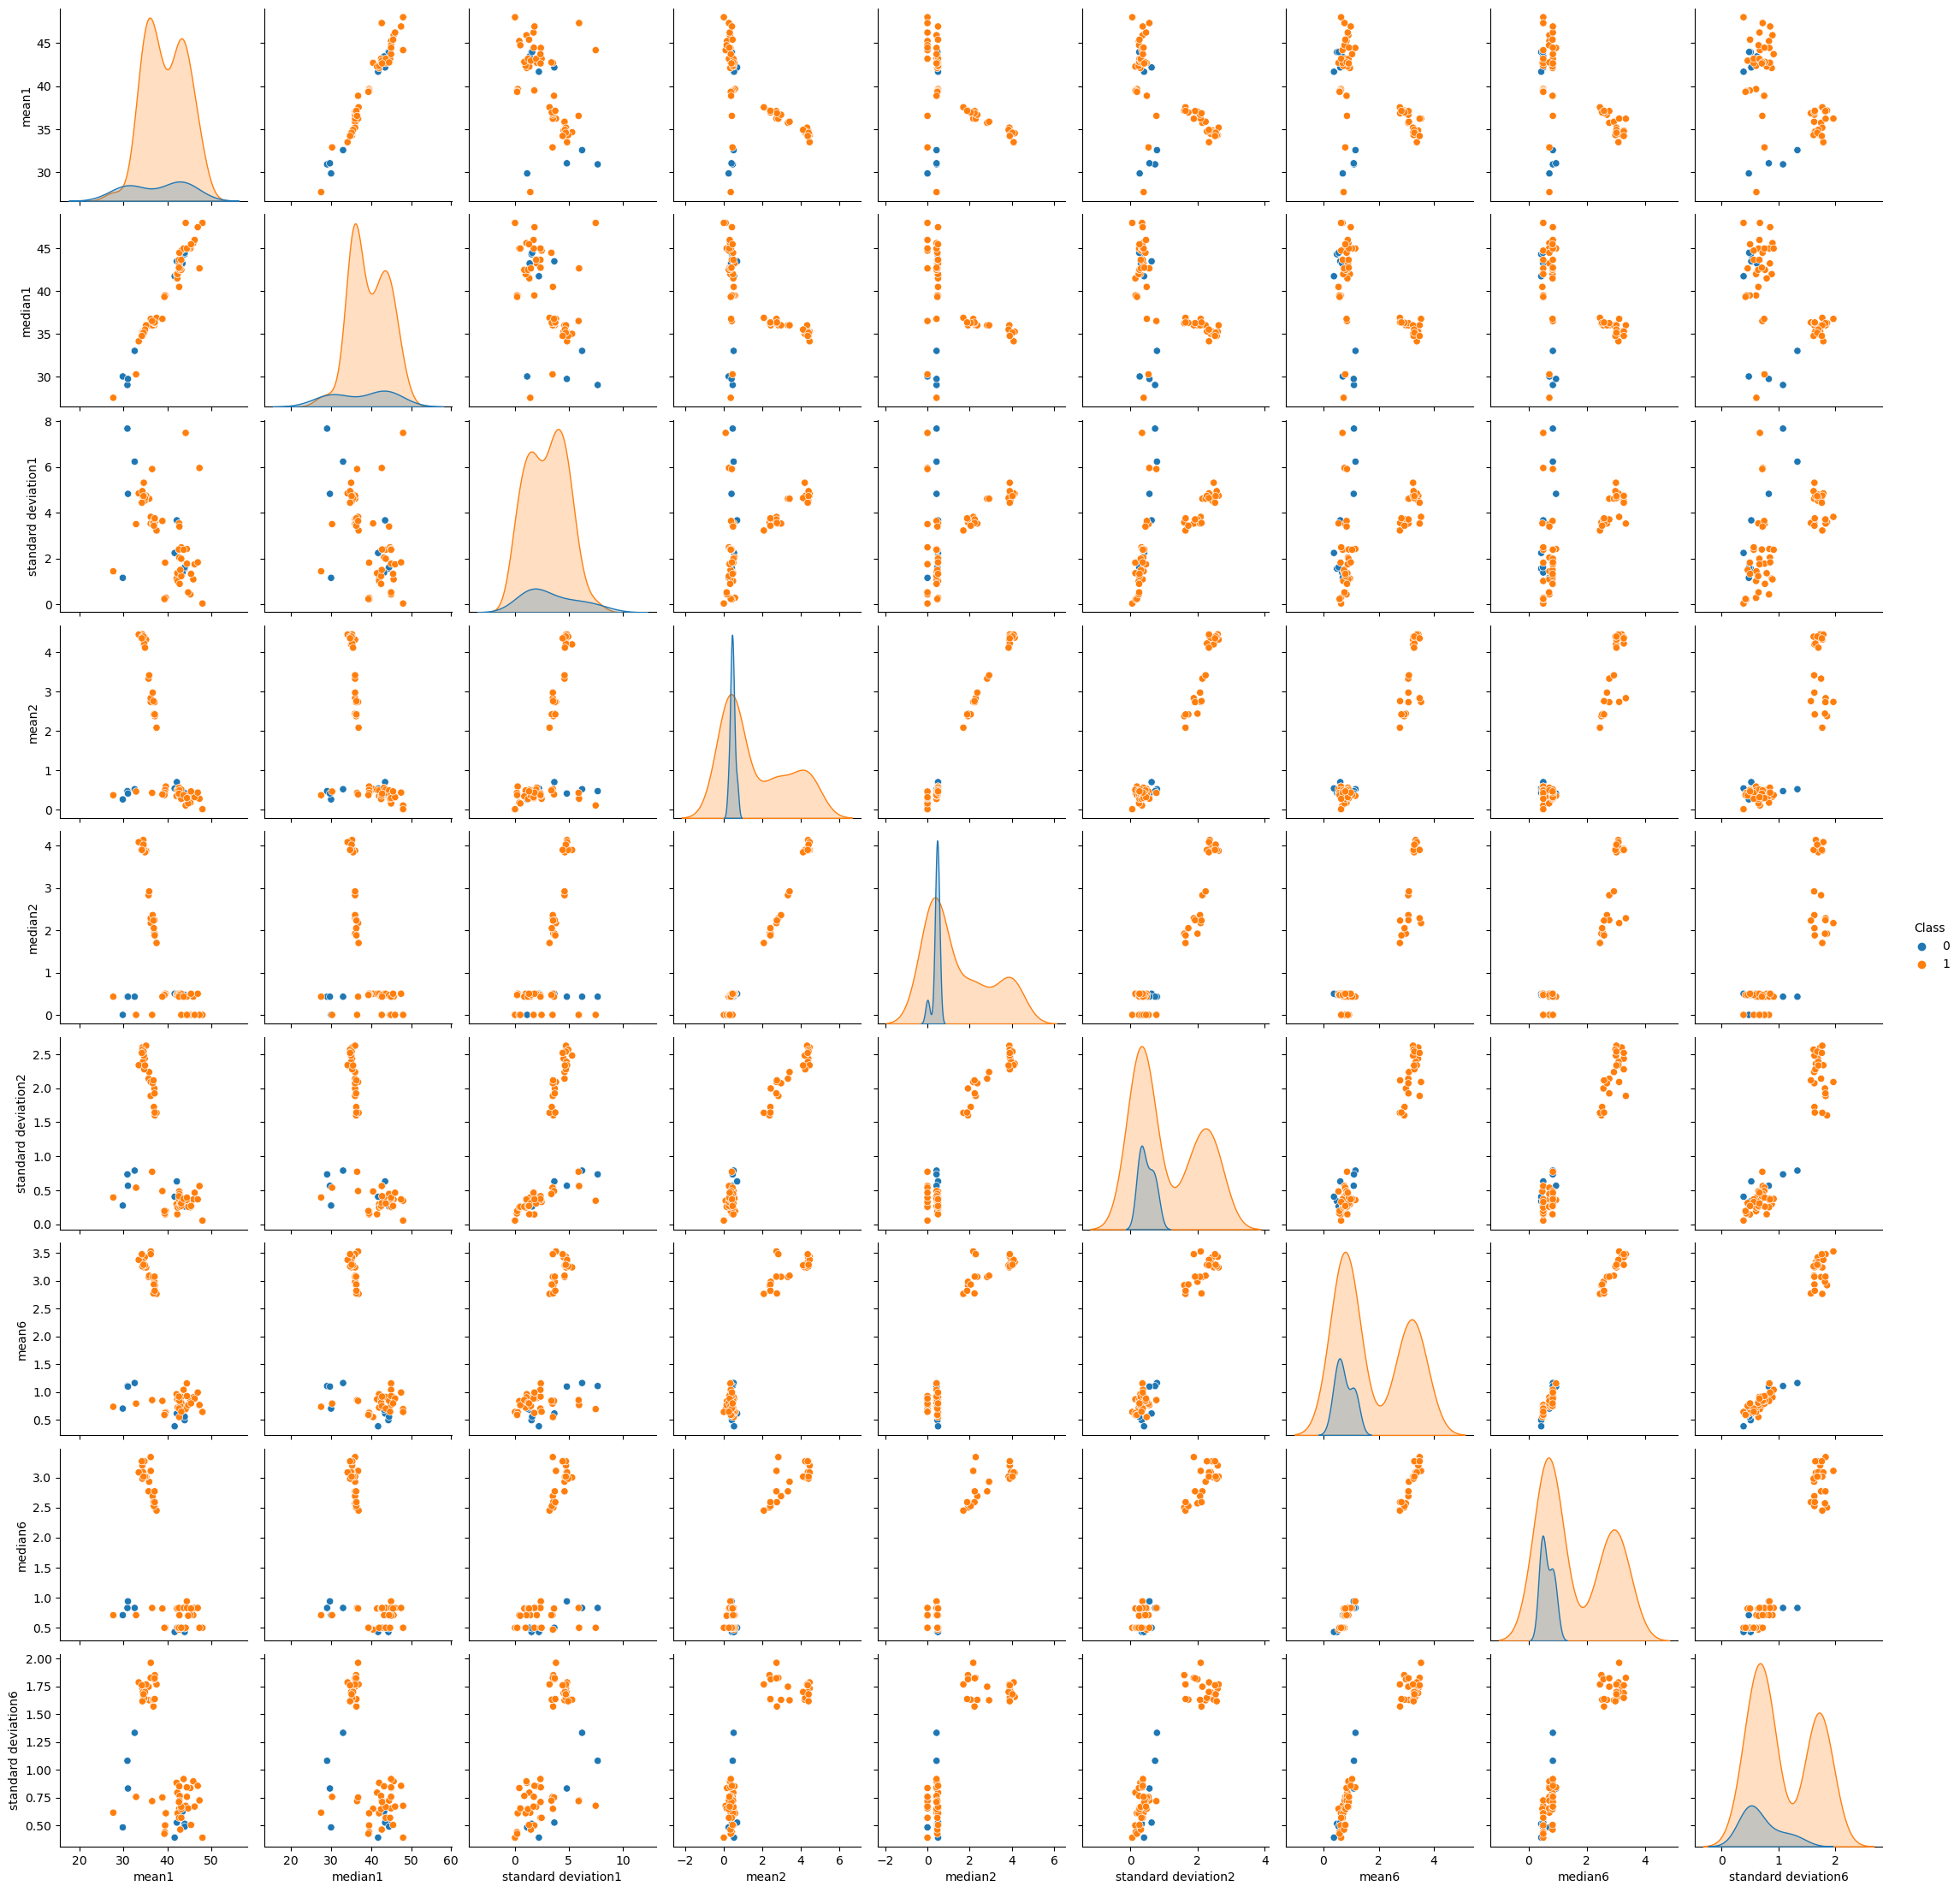

In [12]:
#0 means bending class; 1 means other activities class
sns.pairplot(ext_training_df, hue="Class")

#### ii. Splitted Plots

In [13]:
All_train_df

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0.0,42.00,0.71,21.25,0.43,30.00,0.00
1,250.0,41.50,0.50,20.25,1.48,31.25,1.09
2,500.0,41.50,0.50,14.25,1.92,33.00,0.00
3,750.0,40.75,0.83,15.75,0.43,33.00,0.00
4,1000.0,40.00,0.71,20.00,2.74,32.75,0.43
...,...,...,...,...,...,...,...
475,118750.0,31.50,1.66,12.50,3.20,14.25,4.44
476,119000.0,27.33,1.25,11.33,0.94,20.00,4.00
477,119250.0,37.80,7.68,14.20,2.48,17.25,0.83
478,119500.0,33.75,1.30,15.75,5.21,16.50,2.69


In [14]:
trainset_split2_df = pd.DataFrame()


time_domain_list = list()
for i in range(0,33120,480):
    time_domain_list.clear()
    for j in range(len(time_series)):
        Min1 = All_train_df[i:i+240][time_series[j]].min()
        Min2 = All_train_df[i+240:i+480][time_series[j]].min()
        
        Max1 = All_train_df[i:i+240][time_series[j]].max()
        Max2 = All_train_df[i+240:i+480][time_series[j]].max()
        
        Mean1 = All_train_df[i:i+240][time_series[j]].mean()
        Mean2 = All_train_df[i+240:i+480][time_series[j]].mean()
        
        Median1 = All_train_df[i:i+240][time_series[j]].median()
        Median2 = All_train_df[i+240:i+480][time_series[j]].median()
        
        SD1 = All_train_df[i:i+240][time_series[j]].std()
        SD2 = All_train_df[i+240:i+480][time_series[j]].std()
        
        FirstQ1 = All_train_df[i:i+240][time_series[j]].quantile(0.25)
        FirstQ2 = All_train_df[i+240:i+480][time_series[j]].quantile(0.25)
        
        ThirdQ1 = All_train_df[i:i+240][time_series[j]].quantile(0.75)
        ThirdQ2 = All_train_df[i+240:i+480][time_series[j]].quantile(0.75)
        
        time_domain_list.extend([Min1, Min2, Max1, Max2, Mean1, Mean2, Median1, Median2, SD1, SD2, FirstQ1, FirstQ2, ThirdQ1, ThirdQ2])
    
    trainset_split2_df = (pd.concat([trainset_split2_df, pd.DataFrame(time_domain_list).T], ignore_index=True))

trainset_split2_df.index.name = 'Instance'
trainset_split2_df.index = trainset_split2_df.index + 1

columns_list = list()
for i in range(42):
    for j in range(2):
        columns_list.append(time_domain_features[i%7]+str(int(i/7+1))+'-'+str(int(j+1)))
#trainset_split2_df.columns = [time_domain_features[i%7]+str(int(i/7+1))+'-'+str(int(i%2+1)) for i in range(84)]
trainset_split2_df.columns = columns_list
                            
trainset_split2_df

,min1-1,min1-2,max1-1,max1-2,mean1-1,mean1-2,median1-1,median1-2,standard deviation1-1,standard deviation1-2,...,mean6-1,mean6-2,median6-1,median6-2,standard deviation6-1,standard deviation6-2,1st quartile6-1,1st quartile6-2,3rd quartile6-1,3rd quartile6-2
Instance,,,,,,,,,,,,,,,,,,,,,
1,36.50,35.00,46.50,47.40,44.057167,43.851833,44.500,43.500,1.556971,1.557168,...,0.598250,0.388333,0.500,0.000,0.526656,0.478528,0.0000,0.0000,1.0000,0.7100
2,33.75,33.00,47.75,46.00,43.278875,41.080750,45.000,42.000,3.473355,3.537481,...,0.640958,0.586083,0.765,0.470,0.554542,0.491873,0.0000,0.0000,1.2200,0.8700
3,33.00,39.25,45.75,43.67,41.621208,41.734917,42.330,41.500,3.118644,0.595920,...,0.419083,0.347500,0.430,0.430,0.411200,0.363144,0.0000,0.0000,0.7100,0.5000
4,39.00,37.00,48.00,46.50,44.117042,42.792875,45.000,42.670,1.359836,1.058792,...,0.815417,0.543875,0.710,0.500,0.718016,0.473445,0.4300,0.4300,1.1200,0.7100
5,36.67,36.25,45.00,48.00,43.486208,44.452042,43.710,44.500,1.281976,1.771251,...,0.524875,0.585750,0.470,0.500,0.486847,0.487918,0.0000,0.4225,0.8300,0.8300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,22.33,20.75,46.00,46.25,34.966250,34.560417,35.500,35.000,4.733014,4.752584,...,3.146333,3.430208,3.035,3.350,1.638218,1.647979,1.7975,2.1700,4.2175,4.4400
66,21.50,21.75,45.67,51.00,34.737042,35.134583,35.500,35.585,4.276717,4.989014,...,3.334125,3.225917,3.000,3.085,1.737573,1.665326,2.1800,2.0500,4.5125,4.3500
67,18.33,20.33,45.00,47.67,33.886458,34.779625,34.375,35.000,5.143776,4.714249,...,3.248417,3.274750,3.015,2.955,1.565557,1.670593,2.0500,2.0500,4.2250,4.4375


In [15]:
#Choose in 1(c)iv: Mean, Medium, Standard Deviation
#time series 1, 2, 6
ext_spt_df = pd.DataFrame()


ext_spt_columns = list()
for i in [0,1,5]:
    for j in columns_list[4+14*i:10+14*i:1]:
        ext_spt_columns.append(j)
ext_spt_df = trainset_split2_df[ext_spt_columns]

ext_spt_df

,mean1-1,mean1-2,median1-1,median1-2,standard deviation1-1,standard deviation1-2,mean2-1,mean2-2,median2-1,median2-2,standard deviation2-1,standard deviation2-2,mean6-1,mean6-2,median6-1,median6-2,standard deviation6-1,standard deviation6-2
Instance,,,,,,,,,,,,,,,,,,
1,44.057167,43.851833,44.500,43.500,1.556971,1.557168,0.381042,0.471458,0.470,0.500,0.329540,0.342346,0.598250,0.388333,0.500,0.000,0.526656,0.478528
2,43.278875,41.080750,45.000,42.000,3.473355,3.537481,0.673292,0.718792,0.485,0.500,0.634285,0.627915,0.640958,0.586083,0.765,0.470,0.554542,0.491873
3,41.621208,41.734917,42.330,41.500,3.118644,0.595920,0.623083,0.448875,0.500,0.500,0.489595,0.273050,0.419083,0.347500,0.430,0.430,0.411200,0.363144
4,44.117042,42.792875,45.000,42.670,1.359836,1.058792,0.250042,0.506125,0.000,0.500,0.314099,0.260761,0.815417,0.543875,0.710,0.500,0.718016,0.473445
5,43.486208,44.452042,43.710,44.500,1.281976,1.771251,0.378667,0.447583,0.470,0.500,0.284434,0.235493,0.524875,0.585750,0.470,0.500,0.486847,0.487918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,34.966250,34.560417,35.500,35.000,4.733014,4.752584,4.207958,4.239625,3.900,3.960,2.331940,2.227526,3.146333,3.430208,3.035,3.350,1.638218,1.647979
66,34.737042,35.134583,35.500,35.585,4.276717,4.989014,4.217333,4.014167,4.030,3.670,2.337759,2.333172,3.334125,3.225917,3.000,3.085,1.737573,1.665326
67,33.886458,34.779625,34.375,35.000,5.143776,4.714249,4.332208,4.461708,3.900,3.935,2.453111,2.682846,3.248417,3.274750,3.015,2.955,1.565557,1.670593


In [16]:
#let bending class = 0, other activities = 1
class_list = list(range(69))
class_list = [0 for i in range(9)]+[1 for i in range(10,70,1)]

ext_spt_df['Class'] = class_list

ext_spt_df

,mean1-1,mean1-2,median1-1,median1-2,standard deviation1-1,standard deviation1-2,mean2-1,mean2-2,median2-1,median2-2,standard deviation2-1,standard deviation2-2,mean6-1,mean6-2,median6-1,median6-2,standard deviation6-1,standard deviation6-2,Class
Instance,,,,,,,,,,,,,,,,,,,
1,44.057167,43.851833,44.500,43.500,1.556971,1.557168,0.381042,0.471458,0.470,0.500,0.329540,0.342346,0.598250,0.388333,0.500,0.000,0.526656,0.478528,0
2,43.278875,41.080750,45.000,42.000,3.473355,3.537481,0.673292,0.718792,0.485,0.500,0.634285,0.627915,0.640958,0.586083,0.765,0.470,0.554542,0.491873,0
3,41.621208,41.734917,42.330,41.500,3.118644,0.595920,0.623083,0.448875,0.500,0.500,0.489595,0.273050,0.419083,0.347500,0.430,0.430,0.411200,0.363144,0
4,44.117042,42.792875,45.000,42.670,1.359836,1.058792,0.250042,0.506125,0.000,0.500,0.314099,0.260761,0.815417,0.543875,0.710,0.500,0.718016,0.473445,0
5,43.486208,44.452042,43.710,44.500,1.281976,1.771251,0.378667,0.447583,0.470,0.500,0.284434,0.235493,0.524875,0.585750,0.470,0.500,0.486847,0.487918,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,34.966250,34.560417,35.500,35.000,4.733014,4.752584,4.207958,4.239625,3.900,3.960,2.331940,2.227526,3.146333,3.430208,3.035,3.350,1.638218,1.647979,1
66,34.737042,35.134583,35.500,35.585,4.276717,4.989014,4.217333,4.014167,4.030,3.670,2.337759,2.333172,3.334125,3.225917,3.000,3.085,1.737573,1.665326,1
67,33.886458,34.779625,34.375,35.000,5.143776,4.714249,4.332208,4.461708,3.900,3.935,2.453111,2.682846,3.248417,3.274750,3.015,2.955,1.565557,1.670593,1


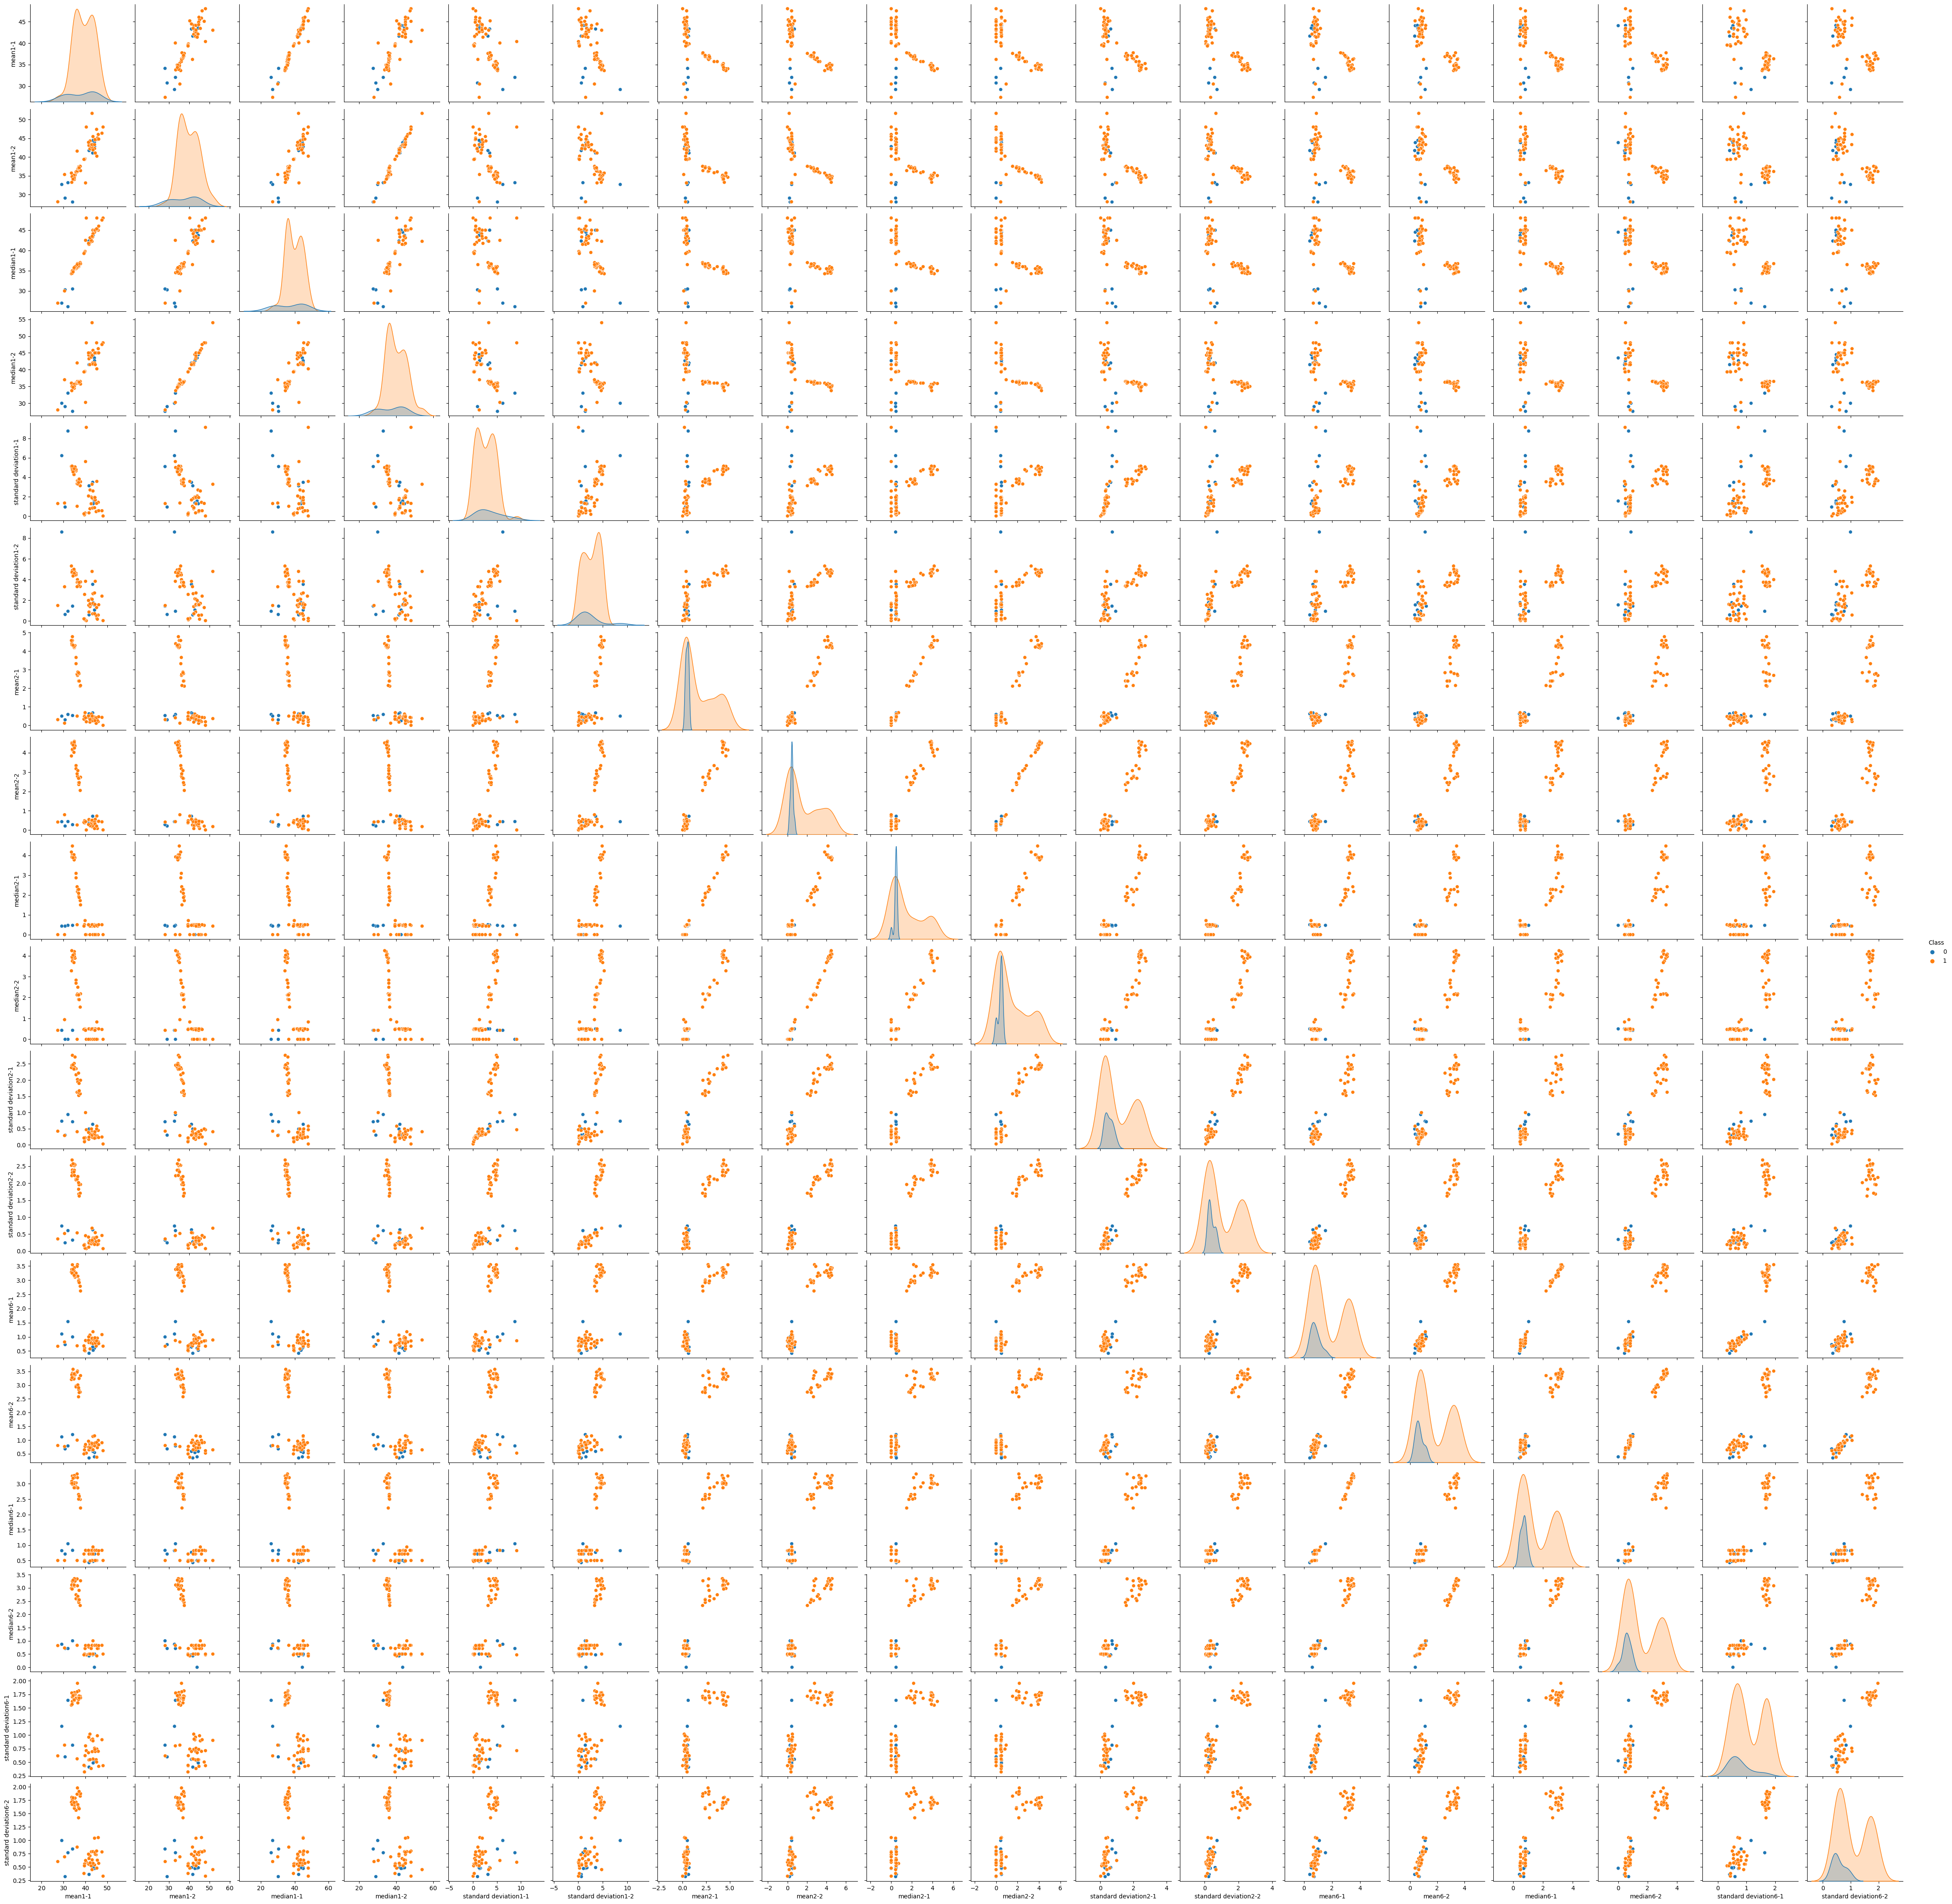

In [17]:
#0 means bending class; 1 means other activities class
sns.pairplot(ext_spt_df, hue="Class")

### Do you see any considerable differnce in the result with those of 2(a)i?
As the data splits more, it becomes more concentrated in each cluster.

#### iii. Time Series Segments

Just choose the three time domain features which I think is the most important as mentioned in HW3-1(c)iv..

In [18]:
imp_features = ['mean','median','standard deviation']

def split_traindata(l:int):
    trainset_split_df = pd.DataFrame()
    
    time_domain_list = list()
    for i in range(0,33120,480):
        time_domain_list.clear()
        for j in range(len(time_series)): #6 time_series = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
            #for k in range(len(imp_features)): #features: mean median sd
            
            remainder = 480%l
            
            if(remainder==0):
                count = 1
                while(count <= l):
                    feature = All_train_df[i+(int(480/l)*(count-1)):i+(int(480/l)*count)][time_series[j]].mean()
                    time_domain_list.append(feature)
                    count+=1

                count = 1        
                while(count <= l):
                    feature = All_train_df[i+(int(480/l)*(count-1)):i+(int(480/l)*count)][time_series[j]].median()
                    time_domain_list.append(feature)
                    count+=1

                count = 1
                while(count <= l):
                    feature = All_train_df[i+(int(480/l)*(count-1)):i+(int(480/l)*count)][time_series[j]].std()
                    time_domain_list.append(feature)
                    count+=1

                    
            else:# 480 is indivisible by l = 7,9,11,13,14,17,18,19
                count = 1
                while(count <= l):
                    if(count == 1):
                        feature = All_train_df[i+(int(480/l)*(count-1)):i+(int(480/l)*count+1)][time_series[j]].mean()
                        time_domain_list.append(feature)
                        count+=1
                        remainder-=1
                        
                    else:
                        if(remainder != 0):
                            feature = All_train_df[i+(int(480/l)*(count-1))+1:i+(int(480/l)*count+1)][time_series[j]].mean()
                            time_domain_list.append(feature)
                            count+=1
                            remainder-=1
                        else:
                            feature = All_train_df[i+(int(480/l)*(count-1))+1:i+(int(480/l)*count)][time_series[j]].mean()
                            time_domain_list.append(feature)
                            count+=1
                            

                count = 1
                while(count <= l):
                    if(count == 1):
                        feature = All_train_df[i+(int(480/l)*(count-1)):i+(int(480/l)*count+1)][time_series[j]].median()
                        time_domain_list.append(feature)
                        count+=1
                        remainder-=1
                        
                    else:
                        if(remainder != 0):
                            feature = All_train_df[i+(int(480/l)*(count-1))+1:i+(int(480/l)*count+1)][time_series[j]].median()
                            time_domain_list.append(feature)
                            count+=1
                            remainder-=1
                        else:
                            feature = All_train_df[i+(int(480/l)*(count-1))+1:i+(int(480/l)*count)][time_series[j]].median()
                            time_domain_list.append(feature)
                            count+=1

                count = 1
                while(count <= l):
                    if(count == 1):
                        feature = All_train_df[i+(int(480/l)*(count-1)):i+(int(480/l)*count+1)][time_series[j]].std()
                        time_domain_list.append(feature)
                        count+=1
                        remainder-=1
                        
                    else:
                        if(remainder != 0):
                            feature = All_train_df[i+(int(480/l)*(count-1))+1:i+(int(480/l)*count+1)][time_series[j]].std()
                            time_domain_list.append(feature)
                            count+=1
                            remainder-=1
                        else:
                            feature = All_train_df[i+(int(480/l)*(count-1))+1:i+(int(480/l)*count)][time_series[j]].std()
                            time_domain_list.append(feature)
                            count+=1              
                
        trainset_split_df = (pd.concat([trainset_split_df, pd.DataFrame(time_domain_list).T], ignore_index=True))


    trainset_split_df.index.name = 'Instance'
    trainset_split_df.index = trainset_split_df.index + 1

    columns_list = list()
    for i in range(18):#6 time series x 3 features
        for j in range(l):
            columns_list.append(imp_features[i%3]+str(int(i/3+1))+'-'+str(int(j+1)))
    trainset_split_df.columns = columns_list
    
    
    #let bending class = 0, other activities = 1
    class_list = list(range(69))
    class_list = [0 for i in range(9)]+[1 for i in range(10,70,1)]
    trainset_split_df['Class'] = class_list
    
    return trainset_split_df

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFECV


best_LPpair = list()
best_LPpair_mean = list()
best_max_cvtest_score = 0
best_mean_cvtest_score = 0

for l in range(1,21):
    print('l=',l)
    X = split_traindata(l).drop('Class', axis=1) #use the whole training data
    y = split_traindata(l).Class

    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.27, random_state=42)
    #69*0.27=18.63 would have 19 test data to align the number of all test data instance

    #using sklearn LogR
    model = LogisticRegression()

    #fit the model with data
    model.fit(X, y)
    

    #Cross Validation - RFECV
    selector = RFECV(model, step=1, cv=5, scoring='accuracy')
    selector = selector.fit(X, y)

    print(f'The (l,p) pair after selection:({l},{selector.n_features_})')
#     print(selector.support_)
#     print(selector.ranking_)
#     print(selector.cv_results_)

    
    # Refit
    X_train_selected = selector.transform(X)
    
    model.fit(X_train_selected, y)

        
    #choose the best one
    max_cvtest_score = selector.cv_results_['mean_test_score'].max()
    if(max_cvtest_score > best_max_cvtest_score):
        best_max_cvtest_score = max_cvtest_score
        best_LPpair.clear()
        best_LPpair.append([l,selector.n_features_])
    elif(max_cvtest_score == best_max_cvtest_score):
        best_LPpair.append([l,selector.n_features_])

    mean_cvtest_score = selector.cv_results_['mean_test_score'].mean()
    if(mean_cvtest_score > best_mean_cvtest_score):
        best_mean_cvtest_score = mean_cvtest_score
        best_LPpair_mean.clear()
        best_LPpair_mean.append([l,selector.n_features_])
    elif(mean_cvtest_score == best_mean_cvtest_score):
        best_LPpair_mean.append([l,selector.n_features_])
        
    print()
    

#print("Good (l,p) pairs after selection:", good_LPpairs)
#print("The best accuracy is:", best_score)
#print()
print(f"Among all Good pairs, the best pair with the highest cv mean test score is: (l,p) = {best_LPpair}") # ({best_LPpair[0]},{best_LPpair[1]}")
print(best_max_cvtest_score)

print(f"Among all Good pairs, the best pair with the highest mean of cv mean test score is: (l,p) = {best_LPpair_mean}")
print(best_mean_cvtest_score)

l= 1
The (l,p) pair after selection:(1,7)

l= 2
The (l,p) pair after selection:(2,12)

l= 3
The (l,p) pair after selection:(3,52)

l= 4
The (l,p) pair after selection:(4,59)

l= 5
The (l,p) pair after selection:(5,88)

l= 6
The (l,p) pair after selection:(6,11)

l= 7
The (l,p) pair after selection:(7,25)

l= 8
The (l,p) pair after selection:(8,98)

l= 9
The (l,p) pair after selection:(9,50)

l= 10
The (l,p) pair after selection:(10,157)

l= 11
The (l,p) pair after selection:(11,87)

l= 12
The (l,p) pair after selection:(12,196)

l= 13
The (l,p) pair after selection:(13,1)

l= 14
The (l,p) pair after selection:(14,214)

l= 15
The (l,p) pair after selection:(15,248)

l= 16
The (l,p) pair after selection:(16,6)

l= 17
The (l,p) pair after selection:(17,225)

l= 18
The (l,p) pair after selection:(18,233)

l= 19
The (l,p) pair after selection:(19,82)

l= 20
The (l,p) pair after selection:(20,1)

Among all Good pairs, the best pair with the highest cv mean test score is: (l,p) = [[5, 88], [1

Since simply choosing highest CV mean test score might be too arbitrary, I choose the best pair by calculating the mean of all cv test score, and choose the highest one. Therefore, the best pair I choose is (l,p)=(19,82).

### Explain what the right way and the wrong way are to perform cv in this problem.
Right way:<br>
We have to start with entire features in training data and do the cross validation at the same time.


wrong way:<br>
Select the set of predictors and ignore the rest features of the training set. This would ignore the fact that the procedure has already seen the labels of the training data and made use of them. This is a form of training and must be included in the validation process

#### iv. Confusion Matrix

In [20]:
#best pair l=19
X = split_traindata(19).drop('Class', axis=1)
y = split_traindata(19).Class

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.27, random_state=42)

#using sklearn LogR
model = LogisticRegression()

#fit the model with data
model.fit(X, y)

selector = RFECV(model, step=1, cv=5, scoring='accuracy')
selector = selector.fit(X, y)


selector.support_

array([False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True,  True, False,  True,  True,  True,  True,
       False, False, False,  True,  True, False, False, False,  True,
       False,  True, False,  True, False,  True,  True, False, False,
        True,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False,  True,

In [21]:
selector.n_features_

82

In [22]:
#refit
X_train_selected = selector.transform(X)

model.fit(X_train_selected, y)
y_pred = model.predict(X_train_selected)

cm=confusion_matrix(y, y_pred)
TN=cm[0][0]
FP=cm[0][1]
FN=cm[1][0]
TP=cm[1][1]

print("The confusion matrix is:\n", cm)
print(model.score(X_train_selected, y))
print()

The confusion matrix is:
 [[ 9  0]
 [ 0 60]]
1.0



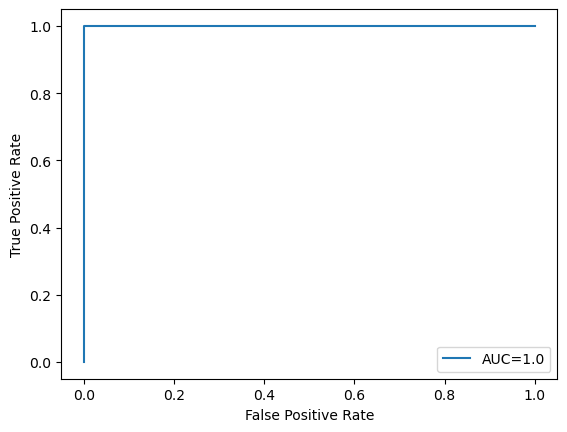

In [23]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
y_pred_proba = model.predict_proba(X_train_selected)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y, y_pred_proba)

auc = roc_auc_score(y, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [24]:
import statsmodels.api as sm

#using sm package to compute p-value
SMmodel = sm.Logit(y, X_train_selected).fit()

print(SMmodel.summary())

         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

#### v. Test Classifier

In [25]:
All_test_df

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0,39.25,0.43,22.75,0.43,33.75,1.30
1,250,39.25,0.43,23.00,0.00,33.00,0.00
2,500,39.25,0.43,23.25,0.43,33.00,0.00
3,750,39.50,0.50,23.00,0.71,33.00,0.00
4,1000,39.50,0.50,24.00,0.00,33.00,0.00
...,...,...,...,...,...,...,...
475,118750,36.50,2.87,18.50,2.29,16.00,2.16
476,119000,35.00,9.70,18.67,0.94,18.33,2.05
477,119250,28.25,4.82,16.00,3.27,22.00,5.66
478,119500,32.25,8.26,12.50,4.15,15.25,2.77


In [26]:
l=19
testset_split_df = pd.DataFrame()
time_domain_list = list()

for i in range(0,9120,480):
    time_domain_list.clear()
    for j in range(len(time_series)): #6 time_series = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']            
        remainder = 480%l

        if(remainder==0):
            count = 1
            while(count <= l):
                feature = All_test_df[i+(int(480/l)*(count-1)):i+(int(480/l)*count)][time_series[j]].mean()
                time_domain_list.append(feature)
                count+=1

            count = 1        
            while(count <= l):
                feature = All_test_df[i+(int(480/l)*(count-1)):i+(int(480/l)*count)][time_series[j]].median()
                time_domain_list.append(feature)
                count+=1

            count = 1
            while(count <= l):
                feature = All_test_df[i+(int(480/l)*(count-1)):i+(int(480/l)*count)][time_series[j]].std()
                time_domain_list.append(feature)
                count+=1


        else:# 480 is indivisible by l = 7,9,11,13,14,17,18,19
            count = 1
            while(count <= l):
                if(count == 1):
                    feature = All_test_df[i+(int(480/l)*(count-1)):i+(int(480/l)*count+1)][time_series[j]].mean()
                    time_domain_list.append(feature)
                    count+=1
                    remainder-=1

                else:
                    if(remainder != 0):
                        feature = All_test_df[i+(int(480/l)*(count-1))+1:i+(int(480/l)*count+1)][time_series[j]].mean()
                        time_domain_list.append(feature)
                        count+=1
                        remainder-=1
                    else:
                        feature = All_test_df[i+(int(480/l)*(count-1))+1:i+(int(480/l)*count)][time_series[j]].mean()
                        time_domain_list.append(feature)
                        count+=1


            count = 1
            while(count <= l):
                if(count == 1):
                    feature = All_test_df[i+(int(480/l)*(count-1)):i+(int(480/l)*count+1)][time_series[j]].median()
                    time_domain_list.append(feature)
                    count+=1
                    remainder-=1

                else:
                    if(remainder != 0):
                        feature = All_test_df[i+(int(480/l)*(count-1))+1:i+(int(480/l)*count+1)][time_series[j]].median()
                        time_domain_list.append(feature)
                        count+=1
                        remainder-=1
                    else:
                        feature = All_test_df[i+(int(480/l)*(count-1))+1:i+(int(480/l)*count)][time_series[j]].median()
                        time_domain_list.append(feature)
                        count+=1

            count = 1
            while(count <= l):
                if(count == 1):
                    feature = All_test_df[i+(int(480/l)*(count-1)):i+(int(480/l)*count+1)][time_series[j]].std()
                    time_domain_list.append(feature)
                    count+=1
                    remainder-=1

                else:
                    if(remainder != 0):
                        feature = All_test_df[i+(int(480/l)*(count-1))+1:i+(int(480/l)*count+1)][time_series[j]].std()
                        time_domain_list.append(feature)
                        count+=1
                        remainder-=1
                    else:
                        feature = All_test_df[i+(int(480/l)*(count-1))+1:i+(int(480/l)*count)][time_series[j]].std()
                        time_domain_list.append(feature)
                        count+=1              

    testset_split_df = (pd.concat([testset_split_df, pd.DataFrame(time_domain_list).T], ignore_index=True))
        
        
testset_split_df.index.name = 'Instance'
testset_split_df.index = testset_split_df.index + 1

columns_list = list()
for i in range(18):#6 time series x 3 features
    for j in range(l):
        columns_list.append(imp_features[i%3]+str(int(i/3+1))+'-'+str(int(j+1)))
testset_split_df.columns = columns_list


#let bending class = 0, other activities = 1
class_list = list(range(19))
class_list = [0 for i in range(4)]+[1 for i in range(5,20)]
testset_split_df['Class'] = class_list

testset_split_df

,mean1-1,mean1-2,mean1-3,mean1-4,mean1-5,mean1-6,mean1-7,mean1-8,mean1-9,mean1-10,...,standard deviation6-11,standard deviation6-12,standard deviation6-13,standard deviation6-14,standard deviation6-15,standard deviation6-16,standard deviation6-17,standard deviation6-18,standard deviation6-19,Class
Instance,,,,,,,,,,,,,,,,,,,,,
1,39.737308,41.2336,41.7100,41.9668,42.0132,42.000000,39.218750,40.899583,40.420417,39.392083,...,0.575595,0.369679,0.405373,0.477229,0.653698,0.472299,0.259270,0.553143,0.309516,0
2,43.442692,43.4064,43.4192,42.9104,42.3232,42.267083,42.097083,42.079583,42.114583,42.062500,...,0.593254,0.773003,0.561104,0.769756,0.246541,0.269954,0.504512,0.412855,0.338341,0
3,19.592692,22.1268,22.9900,22.9964,22.9864,23.560000,27.365000,32.128333,27.694167,24.517500,...,1.111157,0.751587,0.499122,0.971521,0.415653,0.697274,1.188981,0.279038,0.294631,0
4,27.012692,28.8264,29.9400,29.1400,28.5200,29.060833,29.718750,28.982500,29.982083,29.916667,...,0.590590,0.902080,0.569803,0.856064,1.611529,1.193556,1.216125,1.890390,1.211747,0
5,36.272308,37.0668,37.2436,36.7136,37.5556,36.850833,35.187500,37.454583,37.343750,37.935000,...,1.862262,1.623503,2.296511,1.757324,2.277854,1.701570,2.100754,1.950199,1.655458,1
6,37.285000,36.6464,36.9536,36.8900,36.7632,36.500417,37.066250,36.454583,36.445833,36.822917,...,1.652750,1.921756,1.616869,1.993908,2.016281,1.674075,1.900680,2.118474,1.502670,1
7,37.330385,36.3268,36.2004,36.7404,36.7864,36.701250,36.514167,36.590000,36.723750,36.568750,...,2.166322,1.118988,1.456618,1.765656,2.029579,1.994512,1.815780,1.952412,2.199344,1
8,28.951923,29.0532,28.1304,26.6600,27.0000,27.156250,26.836667,26.257083,26.694167,26.496667,...,0.469713,0.534868,0.666729,0.684624,0.571911,0.551736,0.613159,0.695617,0.438311,1
9,28.951923,29.0532,28.1304,26.6600,27.0000,27.156250,26.836667,26.257083,26.694167,26.496667,...,0.469713,0.534868,0.666729,0.684624,0.571911,0.551736,0.613159,0.695617,0.438311,1


### test classifier

In [27]:
selected_features = list()

selected_index = [i for i,x in enumerate(selector.ranking_) if x==1]

for i in selected_index :
    selected_features.append(selector.feature_names_in_[i])
    
#selected_features

In [28]:
X_test = testset_split_df[selected_features]
y_test = testset_split_df.Class

# #using sklearn LogR
model = LogisticRegression()
model.fit(X_train_selected, y)

# #fit the model with data
y_pred = model.predict(X_test)

print(model.score(X_test, y_test))

0.9473684210526315


I got accuracy <b>0.9473684210526315 on test set</b>, and the accuracy with the best pair (l,p) = (19, 82) with the highest cv test score is <b>0.948493027440396</b>.
They are very close.

#### vi. Separation

Yes, I think the classes seem to be well-seperated because accuracy are high, most of the accuracy close to 1.0 even equal 1.0

#### vii. Imbalance

Yes, because the bending data in data set is less than other activities data, we can see in test dataset, there are 19 instances in total, but only 4 is 0 and 15 is 1; in train dataset, there are 69 instances in total, 13 is 0 and the other(56) is 1. Therefore, if we see in proportion, it is about 1 to 4. However, it is not a big data set, so it would amplify the imbalance relationship in this case.

In [29]:
#case-control sampling
from imblearn.over_sampling import SMOTE

X = split_traindata(19)[selected_features]
y = split_traindata(19).Class

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

X_train, X_test, y_train,y_test = train_test_split(X_res, y_res, test_size = 0.33, random_state=42)

res_model = LogisticRegression()

#fit the model with data
res_model.fit(X_train, y_train)

y_pred = res_model.predict(X_test)

#confusion matrix
cm=confusion_matrix(y_test, y_pred)
TN=cm[0][0]
FP=cm[0][1]
FN=cm[1][0]
TP=cm[1][1]

print("The confusion matrix is:\n", cm)
print(res_model.score(X_test, y_test))
print()

# selector = RFECV(model, step=1, cv=5, scoring='accuracy')
# selector = selector.fit(X_train, y_train)

# selector.support_

The confusion matrix is:
 [[17  0]
 [ 0 23]]
1.0



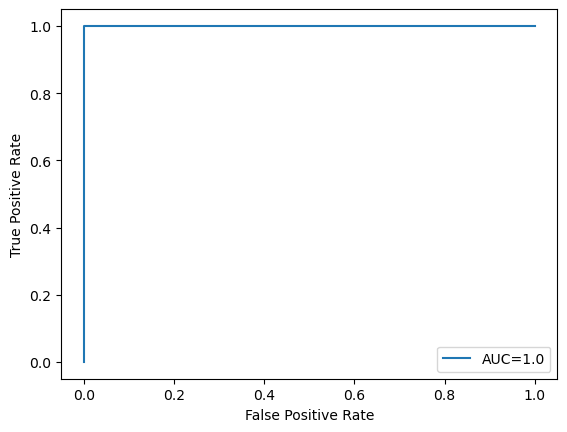

In [30]:
#ROC AUC
y_pred_proba = res_model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [31]:
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

1.0

### (b) Binary Classification Using L1-penalized logistic regression

#### i. Time Series Segments

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import SelectFromModel

best_pair = list()
best_score = 1
bestl = 0
bestP = 0
bestC = 0

for l in range(1,21):
    print('l=',l)
    X = split_traindata(l).drop('Class', axis=1)
    y = split_traindata(l).Class
    
    # Normalized/standardized features
    X = StandardScaler().fit_transform(X)
    
    
    # using sklearn LogR, L1 
    L1model = LogisticRegression(C=1,penalty="l1",solver='liblinear')
    
    #fit the model with data
    L1model.fit(X, y)
    
    
    
    #Cross Validation - LassoCV
    L1selector = LassoCV(cv=5)
    L1selector = L1selector.fit(X, y)

    print(f'The (l, best C) pair after selection:({l},{L1selector.alpha_})')
    importance = np.abs(L1selector.coef_)
    #print(importance)
    idx = importance.argsort()[-5]
    threshold = importance[idx] + 0.001


    sfm = SelectFromModel(L1selector, threshold=threshold)
    sfm.fit(X, y)
    X_transform = sfm.transform(X)

    n_features = sfm.transform(X).shape[1]
    
    print("best p:",n_features)
    
    idx_features = (-importance).argsort()[:n_features]
    name_features = split_traindata(l).columns[idx_features]
    print('Selected features: {}'.format(name_features))
    
    score = L1selector.mse_path_.mean()
    print("MSE=",score)
    if(score < best_score):
        best_pair.clear()
        best_score = score
        bestl = l
        bestp = n_features
        bestC = L1selector.alpha_        
        best_pair.append([l,n_features,L1selector.alpha_])
    elif(score == best_score):
        best_pair.append([l,n_features,L1selector.alpha_])
    
    print()

print("The best pair (l,p,C):", best_pair)

l= 1
The (l, best C) pair after selection:(1,0.1642638743092816)
best p: 1
Selected features: Index(['mean5-1'], dtype='object')
MSE= 0.16446590827451674

l= 2
The (l, best C) pair after selection:(2,0.16207763908931105)
best p: 1
Selected features: Index(['mean5-1'], dtype='object')
MSE= 0.16133299631436632

l= 3
The (l, best C) pair after selection:(3,0.1744317953096825)
best p: 1
Selected features: Index(['mean5-1'], dtype='object')
MSE= 0.17117782056167757

l= 4
The (l, best C) pair after selection:(4,0.1738101764705575)
best p: 1
Selected features: Index(['mean5-1'], dtype='object')
MSE= 0.17472103957776292

l= 5
The (l, best C) pair after selection:(5,0.16471961918094646)
best p: 1
Selected features: Index(['mean5-1'], dtype='object')
MSE= 0.18392156340755125

l= 6
The (l, best C) pair after selection:(6,0.18039868297520256)
best p: 1
Selected features: Index(['mean5-1'], dtype='object')
MSE= 0.16675248510731747

l= 7
The (l, best C) pair after selection:(7,0.17930199784692014)
b

In [33]:
#choose the best pair(20,1,0.17443420828311065)
l=20
testset_split_df = pd.DataFrame()
time_domain_list = list()

for i in range(0,9120,480):
    time_domain_list.clear()
    for j in range(len(time_series)): #6 time_series = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']            
        remainder = 480%l

        if(remainder==0):
            count = 1
            while(count <= l):
                feature = All_test_df[i+(int(480/l)*(count-1)):i+(int(480/l)*count)][time_series[j]].mean()
                time_domain_list.append(feature)
                count+=1

            count = 1        
            while(count <= l):
                feature = All_test_df[i+(int(480/l)*(count-1)):i+(int(480/l)*count)][time_series[j]].median()
                time_domain_list.append(feature)
                count+=1

            count = 1
            while(count <= l):
                feature = All_test_df[i+(int(480/l)*(count-1)):i+(int(480/l)*count)][time_series[j]].std()
                time_domain_list.append(feature)
                count+=1


        else:# 480 is indivisible by l = 7,9,11,13,14,17,18,19
            count = 1
            while(count <= l):
                if(count == 1):
                    feature = All_test_df[i+(int(480/l)*(count-1)):i+(int(480/l)*count+1)][time_series[j]].mean()
                    time_domain_list.append(feature)
                    count+=1
                    remainder-=1

                else:
                    if(remainder != 0):
                        feature = All_test_df[i+(int(480/l)*(count-1))+1:i+(int(480/l)*count+1)][time_series[j]].mean()
                        time_domain_list.append(feature)
                        count+=1
                        remainder-=1
                    else:
                        feature = All_test_df[i+(int(480/l)*(count-1))+1:i+(int(480/l)*count)][time_series[j]].mean()
                        time_domain_list.append(feature)
                        count+=1


            count = 1
            while(count <= l):
                if(count == 1):
                    feature = All_test_df[i+(int(480/l)*(count-1)):i+(int(480/l)*count+1)][time_series[j]].median()
                    time_domain_list.append(feature)
                    count+=1
                    remainder-=1

                else:
                    if(remainder != 0):
                        feature = All_test_df[i+(int(480/l)*(count-1))+1:i+(int(480/l)*count+1)][time_series[j]].median()
                        time_domain_list.append(feature)
                        count+=1
                        remainder-=1
                    else:
                        feature = All_test_df[i+(int(480/l)*(count-1))+1:i+(int(480/l)*count)][time_series[j]].median()
                        time_domain_list.append(feature)
                        count+=1

            count = 1
            while(count <= l):
                if(count == 1):
                    feature = All_test_df[i+(int(480/l)*(count-1)):i+(int(480/l)*count+1)][time_series[j]].std()
                    time_domain_list.append(feature)
                    count+=1
                    remainder-=1

                else:
                    if(remainder != 0):
                        feature = All_test_df[i+(int(480/l)*(count-1))+1:i+(int(480/l)*count+1)][time_series[j]].std()
                        time_domain_list.append(feature)
                        count+=1
                        remainder-=1
                    else:
                        feature = All_test_df[i+(int(480/l)*(count-1))+1:i+(int(480/l)*count)][time_series[j]].std()
                        time_domain_list.append(feature)
                        count+=1              

    testset_split_df = (pd.concat([testset_split_df, pd.DataFrame(time_domain_list).T], ignore_index=True))
        
        
testset_split_df.index.name = 'Instance'
testset_split_df.index = testset_split_df.index + 1

columns_list = list()
for i in range(18):#6 time series x 3 features
    for j in range(l):
        columns_list.append(imp_features[i%3]+str(int(i/3+1))+'-'+str(int(j+1)))
testset_split_df.columns = columns_list


#let bending class = 0, other activities = 1
class_list = list(range(19))
class_list = [0 for i in range(4)]+[1 for i in range(5,20)]
testset_split_df['Class'] = class_list

testset_split_df

,mean1-1,mean1-2,mean1-3,mean1-4,mean1-5,mean1-6,mean1-7,mean1-8,mean1-9,mean1-10,...,standard deviation6-12,standard deviation6-13,standard deviation6-14,standard deviation6-15,standard deviation6-16,standard deviation6-17,standard deviation6-18,standard deviation6-19,standard deviation6-20,Class
Instance,,,,,,,,,,,,,,,,,,,,,
1,39.673750,41.128750,41.697917,41.913333,42.013750,42.000000,40.142500,40.392500,40.517500,39.989583,...,0.540499,0.408592,0.386005,0.558016,0.609340,0.482331,0.337098,0.518891,0.304634,0
2,43.437917,43.412917,43.412500,43.080000,42.406250,42.204583,42.211667,42.086667,42.107500,42.072917,...,0.671880,0.556869,0.759863,0.463071,0.249277,0.356809,0.479373,0.420168,0.364220,0
3,19.420000,21.854167,22.656250,24.392083,21.461667,24.438333,25.472500,29.305417,32.207917,25.545417,...,0.715854,0.647924,0.999265,0.286197,0.432494,1.212541,0.414980,0.298120,0.293671,0
4,26.989583,28.603750,29.947917,29.510417,28.232500,28.960000,29.708333,29.416667,29.138750,30.207917,...,0.874740,0.614633,0.629457,1.472134,1.267470,1.204228,1.246787,1.886749,1.150705,0
5,36.107500,37.395833,36.667083,37.149583,37.297500,37.490000,35.110833,37.180417,36.885417,38.257917,...,1.620478,2.201568,2.082573,1.736581,2.428644,1.546429,1.922445,2.013275,1.651232,1
6,36.909583,37.006667,37.080000,37.041667,36.697917,36.531250,37.205417,36.565833,36.291667,36.431667,...,1.846842,1.806104,1.934953,1.736735,2.069463,1.763838,1.990558,1.772574,1.359256,1
7,37.587083,35.996667,36.055833,37.170417,36.621667,36.420000,37.236250,36.607083,36.413333,36.341250,...,1.737855,1.241703,1.741494,1.332487,2.500403,1.725271,1.975365,1.499706,2.423070,1
8,28.947917,29.010417,28.410000,26.708333,27.000000,27.072917,27.444583,25.774167,26.756667,26.559167,...,0.446459,0.651343,0.618813,0.674098,0.563735,0.562076,0.624266,0.669431,0.427215,1
9,28.947917,29.010417,28.410000,26.708333,27.000000,27.072917,27.444583,25.774167,26.756667,26.559167,...,0.446459,0.651343,0.618813,0.674098,0.563735,0.562076,0.624266,0.669431,0.427215,1


In [34]:
#using test data to test performance
X_train_selected = np.array(split_traindata(20)['median5-3']).reshape(-1, 1)
y_train = np.array(split_traindata(20).Class).reshape(-1,1)
X_test = np.array(testset_split_df['median5-3']).reshape(-1, 1)
y_test = np.array(testset_split_df.Class).reshape(-1, 1)

# using sklearn LogR, L1 
L1model = LogisticRegression(C=bestC,penalty="l1",solver='liblinear')
    
#fit the model with data
L1model.fit(X_train_selected, y_train)

print(L1model.score(X_test, y_test))

0.7894736842105263


#### ii. Comparison

The performance of the L1-penalized only got <b>0.7894736842105263</b> in test data, it doesn't perform well as varible selection using backward selection and RFECV, whose performance is at about <b>0.9473684210526315</b>.

### (c) Multi-class Classification (The Realistic Case)

#### i. Time Series Segments

In [35]:
best_pair = list()
best_score = 1
bestl = 0
bestP = 0
bestC = 0

for l in range(1,21):
    print('l=',l)
    X = split_traindata(l).drop('Class', axis=1)
    y = split_traindata(l).Class
    
    # Normalized/standardized features
    X = StandardScaler().fit_transform(X)
    
    
    # using sklearn LogR, L1 
    Multimodel = LogisticRegression(C=1,penalty="l1",solver='saga',multi_class='multinomial')#only saga solver can use with L1, multinomial
    
    #fit the model with data
    Multimodel.fit(X, y)
    
    
    #Cross Validation - LassoCV
    ML1selector = LassoCV(cv=5)
    ML1selector = ML1selector.fit(X, y)
    
    
    print(f'The (l, best C) pair after selection:({l},{ML1selector.alpha_})')
    importance = np.abs(ML1selector.coef_)
    #print(importance)
    idx = importance.argsort()[-5]
    threshold = importance[idx] + 0.001


    sfm = SelectFromModel(ML1selector, threshold=threshold)
    sfm.fit(X, y)
    X_transform = sfm.transform(X)

    n_features = sfm.transform(X).shape[1]
    
    print("best p:",n_features)
    
    idx_features = (-importance).argsort()[:n_features]
    name_features = split_traindata(l).columns[idx_features]
    print('Selected features: {}'.format(name_features))
    
    score = ML1selector.mse_path_.mean()
    print("MSE=",score)
    if(score < best_score):
        best_pair.clear()
        best_score = score
        bestl = l
        bestp = n_features
        bestC = ML1selector.alpha_        
        best_pair.append([l,n_features,ML1selector.alpha_])
    elif(score == best_score):
        best_pair.append([l,n_features,ML1selector.alpha_])
    
    print()

print("The best pair (l,p,C):", best_pair)

l= 1
The (l, best C) pair after selection:(1,0.1642638743092816)
best p: 1
Selected features: Index(['mean5-1'], dtype='object')
MSE= 0.16446590827451674

l= 2
The (l, best C) pair after selection:(2,0.16207763908931105)
best p: 1
Selected features: Index(['mean5-1'], dtype='object')
MSE= 0.16133299631436632

l= 3
The (l, best C) pair after selection:(3,0.1744317953096825)
best p: 1
Selected features: Index(['mean5-1'], dtype='object')
MSE= 0.17117782056167757

l= 4
The (l, best C) pair after selection:(4,0.1738101764705575)
best p: 1
Selected features: Index(['mean5-1'], dtype='object')
MSE= 0.17472103957776292

l= 5
The (l, best C) pair after selection:(5,0.16471961918094646)
best p: 1
Selected features: Index(['mean5-1'], dtype='object')
MSE= 0.18392156340755125

l= 6
The (l, best C) pair after selection:(6,0.18039868297520256)
best p: 1
Selected features: Index(['mean5-1'], dtype='object')
MSE= 0.16675248510731747

l= 7
The (l, best C) pair after selection:(7,0.17930199784692014)
b

In [36]:
def split_testdf(l):
    testset_split_df = pd.DataFrame()
    time_domain_list = list()

    for i in range(0,9120,480):
        time_domain_list.clear()
        for j in range(len(time_series)): #6 time_series = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']            
            remainder = 480%l

            if(remainder==0):
                count = 1
                while(count <= l):
                    feature = All_test_df[i+(int(480/l)*(count-1)):i+(int(480/l)*count)][time_series[j]].mean()
                    time_domain_list.append(feature)
                    count+=1

                count = 1        
                while(count <= l):
                    feature = All_test_df[i+(int(480/l)*(count-1)):i+(int(480/l)*count)][time_series[j]].median()
                    time_domain_list.append(feature)
                    count+=1

                count = 1
                while(count <= l):
                    feature = All_test_df[i+(int(480/l)*(count-1)):i+(int(480/l)*count)][time_series[j]].std()
                    time_domain_list.append(feature)
                    count+=1


            else:# 480 is indivisible by l = 7,9,11,13,14,17,18,19
                count = 1
                while(count <= l):
                    if(count == 1):
                        feature = All_test_df[i+(int(480/l)*(count-1)):i+(int(480/l)*count+1)][time_series[j]].mean()
                        time_domain_list.append(feature)
                        count+=1
                        remainder-=1

                    else:
                        if(remainder != 0):
                            feature = All_test_df[i+(int(480/l)*(count-1))+1:i+(int(480/l)*count+1)][time_series[j]].mean()
                            time_domain_list.append(feature)
                            count+=1
                            remainder-=1
                        else:
                            feature = All_test_df[i+(int(480/l)*(count-1))+1:i+(int(480/l)*count)][time_series[j]].mean()
                            time_domain_list.append(feature)
                            count+=1


                count = 1
                while(count <= l):
                    if(count == 1):
                        feature = All_test_df[i+(int(480/l)*(count-1)):i+(int(480/l)*count+1)][time_series[j]].median()
                        time_domain_list.append(feature)
                        count+=1
                        remainder-=1

                    else:
                        if(remainder != 0):
                            feature = All_test_df[i+(int(480/l)*(count-1))+1:i+(int(480/l)*count+1)][time_series[j]].median()
                            time_domain_list.append(feature)
                            count+=1
                            remainder-=1
                        else:
                            feature = All_test_df[i+(int(480/l)*(count-1))+1:i+(int(480/l)*count)][time_series[j]].median()
                            time_domain_list.append(feature)
                            count+=1

                count = 1
                while(count <= l):
                    if(count == 1):
                        feature = All_test_df[i+(int(480/l)*(count-1)):i+(int(480/l)*count+1)][time_series[j]].std()
                        time_domain_list.append(feature)
                        count+=1
                        remainder-=1

                    else:
                        if(remainder != 0):
                            feature = All_test_df[i+(int(480/l)*(count-1))+1:i+(int(480/l)*count+1)][time_series[j]].std()
                            time_domain_list.append(feature)
                            count+=1
                            remainder-=1
                        else:
                            feature = All_test_df[i+(int(480/l)*(count-1))+1:i+(int(480/l)*count)][time_series[j]].std()
                            time_domain_list.append(feature)
                            count+=1              

        testset_split_df = (pd.concat([testset_split_df, pd.DataFrame(time_domain_list).T], ignore_index=True))


    testset_split_df.index.name = 'Instance'
    testset_split_df.index = testset_split_df.index + 1

    columns_list = list()
    for i in range(18):#6 time series x 3 features
        for j in range(l):
            columns_list.append(imp_features[i%3]+str(int(i/3+1))+'-'+str(int(j+1)))
    testset_split_df.columns = columns_list


    #let bending class = 0, other activities = 1
    class_list = list(range(19))
    class_list = [0 for i in range(4)]+[1 for i in range(5,20)]
    testset_split_df['Class'] = class_list

    return testset_split_df

#### ii. Naive Bayes

Gaussian

In [37]:
from sklearn.naive_bayes import GaussianNB

for l in range(1,21):
    print('l=',l)
    X = split_traindata(l).drop('Class', axis=1)
    y = split_traindata(l).Class
    
    
    # using sklearn LogR, L1 
    NBmodel = GaussianNB()
    
    #fit the model with data
    NBmodel.fit(X, y)
    
    #print(cross_val_score(NBmodel, X, y, cv=5))
    
    X_test = split_testdf(l).drop('Class', axis=1)
    y_test = split_testdf(l).Class
    
    print("score=",NBmodel.score(X_test, y_test))
    print()

l= 1
score= 0.5789473684210527

l= 2
score= 0.5789473684210527

l= 3
score= 0.5263157894736842

l= 4
score= 0.5263157894736842

l= 5
score= 0.5789473684210527

l= 6
score= 0.5263157894736842

l= 7
score= 0.5789473684210527

l= 8
score= 0.5263157894736842

l= 9
score= 0.5789473684210527

l= 10
score= 0.5789473684210527

l= 11
score= 0.5789473684210527

l= 12
score= 0.631578947368421

l= 13
score= 0.631578947368421

l= 14
score= 0.5263157894736842

l= 15
score= 0.5789473684210527

l= 16
score= 0.5789473684210527

l= 17
score= 0.631578947368421

l= 18
score= 0.631578947368421

l= 19
score= 0.5789473684210527

l= 20
score= 0.5789473684210527



Multinomial priors

In [38]:
from sklearn.naive_bayes import MultinomialNB

for l in range(1,21):
    print('l=',l)
    X = split_traindata(l).drop('Class', axis=1)
    y = split_traindata(l).Class
    
    
    # using sklearn LogR, L1 
    MulNBmodel = MultinomialNB()
    
    #fit the model with data
    MulNBmodel.fit(X, y)
    
    
    X_test = split_testdf(l).drop('Class', axis=1)
    y_test = split_testdf(l).Class
    
    print("score=",MulNBmodel.score(X_test, y_test))
    print()

l= 1
score= 1.0

l= 2
score= 1.0

l= 3
score= 1.0

l= 4
score= 1.0

l= 5
score= 1.0

l= 6
score= 1.0

l= 7
score= 1.0

l= 8
score= 1.0

l= 9
score= 1.0

l= 10
score= 1.0

l= 11
score= 1.0

l= 12
score= 1.0

l= 13
score= 1.0

l= 14
score= 1.0

l= 15
score= 1.0

l= 16
score= 1.0

l= 17
score= 1.0

l= 18
score= 1.0

l= 19
score= 1.0

l= 20
score= 1.0



#### ii. Comparison

In this case, the mulitinomial priors Naive Bayes classifier do better job.

## 3. ISLR 4.8.3

Assuming $f_k(x)$ is normal or Gaussian so the normal density takes the form:
$f_k(x)= {1 \over \sqrt{2\pi}\sigma_k}exp(-{1 \over {2\sigma_k^2}}(x-\mu_k)^2)$

The probability for the Bayes' classifier:
$P_k(x)=$${\pi_k {1 \over \sqrt{2\pi}\sigma}exp(-{1 \over {2\sigma^2}}(x-\mu_k)^2)} \over {\Sigma_{l=1}^K {\pi_l {1 \over \sqrt{2\pi}\sigma}exp(-{1 \over {2\sigma^2}}(x-\mu_l)^2)}}$

Take the log of this function ($P_k(x)$) and expand as follow:
$\log(\pi_k)-\log(\sigma_k)-{\mu_k^2 \over 2\sigma_k^2}+x{\mu_k \over \sigma_k^2}-{x^2 \over 2\sigma_k^2}$

Therefore, We can see that the Bayes' Classifier is not linear and it is quadratic instead.

## 4. ISLR 4.8.7

In [41]:
x = 4
issue_mean = 10
non_mean = 0
var = 36
predProb = (0.8*math.exp(-(x-issue_mean)**2 / 2*var)) / (0.8*math.exp(-(x-issue_mean)**2 / 2*var) + 0.2*math.exp(-(x-non_mean)**2 / 2*var))

predProb

1.8032108262426965e-156